In [1]:
import pandas as pd    
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/passing_data.csv')
possdf = pd.read_csv('data/possession_data.csv')
squadPossDf = pd.read_csv('data/squad_possession_data.csv')

## Understanding the Data

In [3]:
df.shape

(532, 33)

In [4]:
#find entries with the same Player name in possdf
df.loc[df['Player'].duplicated(keep=False)]

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,TotCmp,TotAtt,TotCmp%,TotDist,TotPrgDist,SrtCmp,SrtAtt,SrtCmp%,MedCmp,MedAtt,MedCmp%,LngCmp,LngAtt,LngCmp%,Ast,xAG,xA,A-xAG,KP,1/3Pass,PPA,CrsPA,PrgP,Matches,-9999
46,47,Jan Bednarek,pl POL,DF,Southampton,26-303,1996,2.8,112,129,86.8,2141,859,42,46,91.3,55,60,91.7,13,20,65.0,0,0.1,0.1,-0.1,2,6,0,0,7,Matches,4115ce4e
47,48,Jan Bednarek,pl POL,DF,Aston Villa,26-303,1996,1.1,60,66,90.9,1249,418,16,17,94.1,33,35,94.3,10,12,83.3,0,0.0,0.0,0.0,0,4,0,0,5,Matches,4115ce4e
116,117,Craig Dawson,eng ENG,DF,West Ham,32-279,1990,8.0,245,310,79.0,5404,2170,74,86,86.0,121,137,88.3,48,79,60.8,0,0.1,0.1,-0.1,1,25,0,0,18,Matches,3e9e06cb
117,118,Craig Dawson,eng ENG,DF,Wolves,32-279,1990,1.0,41,46,89.1,788,239,11,12,91.7,27,29,93.1,3,5,60.0,0,0.0,0.0,0.0,1,2,0,0,0,Matches,3e9e06cb
120,121,Leander Dendoncker,be BEL,MF,Aston Villa,27-300,1995,3.8,129,148,87.2,1999,393,66,71,93.0,51,57,89.5,6,10,60.0,0,0.5,0.1,-0.5,5,9,0,0,10,Matches,5a7301ae
121,122,Leander Dendoncker,be BEL,MF,Wolves,27-300,1995,2.4,86,99,86.9,1466,282,45,50,90.0,32,32,100.0,8,8,100.0,0,0.0,0.0,0.0,2,4,1,1,6,Matches,5a7301ae
167,168,Wesley Fofana,fr FRA,DF,Leicester City,22-054,2000,2.0,117,140,83.6,1995,559,44,44,100.0,64,74,86.5,6,13,46.2,0,0.0,0.0,0.0,0,16,0,0,6,Matches,132a82f1
168,169,Wesley Fofana,fr FRA,DF,Chelsea,22-054,2000,2.0,172,190,90.5,2685,658,81,85,95.3,87,93,93.5,2,10,20.0,0,0.0,0.1,0.0,0,5,0,0,7,Matches,132a82f1
185,186,Morgan Gibbs-White,eng ENG,FWMF,Wolves,23-013,2000,2.0,75,95,78.9,1122,345,47,58,81.0,17,21,81.0,7,9,77.8,0,0.1,0.2,-0.1,1,10,1,0,12,Matches,32f60ed8
186,187,Morgan Gibbs-White,eng ENG,MFFW,Nott'ham Forest,23-013,2000,16.3,345,563,61.3,5506,2028,176,234,75.2,105,149,70.5,45,125,36.0,4,4.7,3.3,-0.7,37,35,25,4,69,Matches,32f60ed8


In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,TotCmp,TotAtt,TotCmp%,TotDist,TotPrgDist,SrtCmp,SrtAtt,SrtCmp%,MedCmp,MedAtt,MedCmp%,LngCmp,LngAtt,LngCmp%,Ast,xAG,xA,A-xAG,KP,1/3Pass,PPA,CrsPA,PrgP,Matches,-9999
0,1,Brenden Aaronson,us USA,MFFW,Leeds United,22-110,2000,17.7,411,549,74.9,5186,1517,235,287,81.9,105,137,76.6,16,42,38.1,2,3.1,1.6,-1.1,31,31,8,2,57,Matches,5bc43860
1,2,Che Adams,sct SCO,FW,Southampton,26-211,1996,17.3,252,380,66.3,3571,820,159,214,74.3,54,85,63.5,22,30,73.3,2,2.5,1.8,-0.5,21,17,10,2,23,Matches,f2bf1b0f
2,3,Tyler Adams,us USA,MF,Leeds United,23-360,1999,19.0,895,1091,82.0,13587,4198,488,555,87.9,320,378,84.7,54,90,60.0,0,1.3,0.9,-1.3,23,83,12,0,111,Matches,2b09d998
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,25-138,1997,12.2,474,592,80.1,9865,3618,117,134,87.3,307,347,88.5,46,95,48.4,0,0.0,0.1,0.0,1,29,2,0,36,Matches,c81d773d
4,5,Nayef Aguerd,ma MAR,DF,West Ham,26-316,1996,4.8,150,194,77.3,3032,1347,51,55,92.7,77,94,81.9,20,40,50.0,0,0.0,0.1,0.0,1,11,2,0,9,Matches,288e1e13


In [6]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s',
       'TotCmp', 'TotAtt', 'TotCmp%', 'TotDist', 'TotPrgDist', 'SrtCmp',
       'SrtAtt', 'SrtCmp%', 'MedCmp', 'MedAtt', 'MedCmp%', 'LngCmp', 'LngAtt',
       'LngCmp%', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3Pass', 'PPA', 'CrsPA',
       'PrgP', 'Matches', '-9999'],
      dtype='object')

In [7]:
df.dtypes

Rk              int64
Player         object
Nation         object
Pos            object
Squad          object
Age            object
Born            int64
90s           float64
TotCmp          int64
TotAtt          int64
TotCmp%       float64
TotDist         int64
TotPrgDist      int64
SrtCmp          int64
SrtAtt          int64
SrtCmp%       float64
MedCmp          int64
MedAtt          int64
MedCmp%       float64
LngCmp          int64
LngAtt          int64
LngCmp%       float64
Ast             int64
xAG           float64
xA            float64
A-xAG         float64
KP              int64
1/3Pass         int64
PPA             int64
CrsPA           int64
PrgP            int64
Matches        object
-9999          object
dtype: object

In [8]:
df.describe()

,Rk,Born,90s,TotCmp,TotAtt,TotCmp%,TotDist,TotPrgDist,SrtCmp,SrtAtt,SrtCmp%,MedCmp,MedAtt,MedCmp%,LngCmp,LngAtt,LngCmp%,Ast,xAG,xA,A-xAG,KP,1/3Pass,PPA,CrsPA,PrgP
count,532.000000,532.000000,532.000000,532.000000,532.000000,527.000000,532.000000,532.000000,532.000000,532.000000,522.000000,532.000000,532.000000,515.000000,532.000000,532.000000,490.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,266.500000,1996.133459,8.671053,312.157895,394.624060,76.322770,5452.930451,1932.943609,144.445489,164.233083,86.720690,128.872180,150.740602,81.175146,30.513158,57.471805,53.401429,0.708647,0.774624,0.669361,-0.065977,7.345865,24.105263,6.372180,1.560150,29.793233
std,153.719441,4.246972,6.972717,308.548997,370.908217,10.922825,5755.555676,2396.662939,137.810478,152.667784,9.137272,146.059422,161.576276,15.412895,40.362456,78.912244,21.610079,1.295974,1.124699,0.979172,0.792614,9.905615,28.615514,8.778323,2.764816,33.220636
min,1.000000,1984.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.750000,1993.000000,1.900000,52.250000,65.750000,70.950000,812.000000,206.750000,26.750000,32.750000,83.100000,16.750000,21.000000,75.650000,3.000000,5.750000,42.900000,0.000000,0.000000,0.000000,-0.400000,1.000000,3.000000,0.000000,0.000000,4.000000
50%,266.500000,1996.000000,7.850000,214.000000,281.500000,77.800000,3292.500000,897.500000,101.500000,116.000000,87.600000,70.000000,93.500000,83.300000,13.000000,26.000000,52.700000,0.000000,0.300000,0.300000,0.000000,3.000000,12.000000,3.000000,0.000000,18.000000
75%,399.250000,1999.000000,14.700000,492.250000,664.000000,83.000000,8482.250000,2809.750000,234.250000,271.250000,91.900000,197.500000,230.750000,90.800000,44.250000,83.000000,66.700000,1.000000,1.100000,0.925000,0.000000,10.000000,37.000000,9.000000,2.000000,46.250000
max,532.000000,2007.000000,22.000000,1707.000000,1870.000000,100.000000,31638.000000,14702.000000,673.000000,730.000000,100.000000,801.000000,854.000000,100.000000,258.000000,571.000000,100.000000,11.000000,9.200000,10.000000,4.000000,64.000000,178.000000,66.000000,20.000000,169.000000


## Data Preperation

- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [9]:
filteredPassDf = df[['Player', '90s', 'TotCmp', 'TotAtt', 'TotDist', 'TotPrgDist', 'SrtCmp',
       'SrtAtt', 'MedCmp', 'MedAtt', 'LngCmp', 'LngAtt', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3Pass', 'PPA', 'CrsPA',
       'PrgP']].copy()
infoDf = df[['Player', 'Nation', 'Pos', 'Squad', 'Age']].copy()

In [10]:
filteredPossDf = possdf[['Player', 'Touches', 'Carries', 'TotCarDist', 'PrgCarDist', 'PrgC', '1/3Car', 'CPA', 'Rec', 'PrgR']]

In [11]:
passDuplicates = filteredPassDf.loc[filteredPassDf['Player'].duplicated(keep=False)]
resolvedPassDuplicates = passDuplicates.groupby('Player').sum().reset_index()
filteredPassDf.drop_duplicates(subset='Player', keep=False, inplace=True)
combinedPassDf = pd.concat([filteredPassDf, resolvedPassDuplicates]).reset_index(drop=True)

In [12]:
possDuplicates = filteredPossDf.loc[filteredPossDf['Player'].duplicated(keep=False)]
resolvedPossDuplicates = possDuplicates.groupby('Player').sum().reset_index()
filteredPossDf = filteredPossDf.drop_duplicates(subset='Player', keep=False).copy()
combinedPossDf = pd.concat([filteredPossDf, resolvedPossDuplicates]).reset_index(drop=True)

In [13]:
passpossDf = pd.merge(combinedPassDf, combinedPossDf, on='Player', how='inner')
analyzeDf = pd.merge(infoDf, passpossDf, on='Player', how='inner').reset_index(drop=True)
analyzeDf = analyzeDf.drop_duplicates(subset='Player', keep='first').copy()

In [14]:
analyzeDf['Age'] = analyzeDf['Age'].apply(lambda x: x.split('-')[0])

In [15]:
analyzeDf.dtypes

Player         object
Nation         object
Pos            object
Squad          object
Age            object
90s           float64
TotCmp          int64
TotAtt          int64
TotDist         int64
TotPrgDist      int64
SrtCmp          int64
SrtAtt          int64
MedCmp          int64
MedAtt          int64
LngCmp          int64
LngAtt          int64
Ast             int64
xAG           float64
xA            float64
A-xAG         float64
KP              int64
1/3Pass         int64
PPA             int64
CrsPA           int64
PrgP            int64
Touches         int64
Carries         int64
TotCarDist      int64
PrgCarDist      int64
PrgC            int64
1/3Car          int64
CPA             int64
Rec             int64
PrgR            int64
dtype: object

In [16]:
analyzeDf.dropna(inplace=True)

In [17]:
analyzeDf['Nation'] = analyzeDf['Nation'].apply(lambda x: x.split(' ')[1])

In [18]:
analyzeDf['Pos'] = analyzeDf['Pos'].apply(lambda x: [x[i:i+2] for i in range(0, len(x), 2)])

In [19]:
# filter out players with less than 7 games played (in total minutes)
qualifyingPlayers = analyzeDf[analyzeDf['90s'] > 7]

In [20]:
#filteredPassDf[['TotCmp%', 'SrtCmp%', 'MedCmp%', 'LngCmp%']] = filteredPassDf[['TotCmp%', 'SrtCmp%', 'MedCmp%', 'LngCmp%']].apply(lambda x: x/100)

In [21]:
qualifyingPlayers.describe()

,90s,TotCmp,TotAtt,TotDist,TotPrgDist,SrtCmp,SrtAtt,MedCmp,MedAtt,LngCmp,LngAtt,Ast,xAG,xA,A-xAG,KP,1/3Pass,PPA,CrsPA,PrgP,Touches,Carries,TotCarDist,PrgCarDist,PrgC,1/3Car,CPA,Rec,PrgR
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,14.480714,528.575000,666.835714,9317.617857,3352.296429,241.875000,274.339286,219.746429,256.132143,53.332143,100.121429,1.171429,1.292143,1.118214,-0.120714,12.217857,41.064286,10.646429,2.607143,50.364286,810.767857,448.775000,2321.185714,1187.982143,21.453571,15.492857,5.810714,519.110714,47.203571
std,4.225505,277.492513,312.374904,5473.279827,2548.232967,121.607139,130.955474,148.529531,157.539778,44.236336,88.548548,1.574632,1.324301,1.157239,1.017974,11.424320,30.221692,10.140235,3.391316,33.951201,333.904532,197.056465,1039.711354,613.003286,17.973038,11.604595,8.487175,239.417360,47.827250
min,7.100000,86.000000,124.000000,1009.000000,138.000000,40.000000,41.000000,19.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000,-3.300000,0.000000,2.000000,0.000000,0.000000,0.000000,225.000000,113.000000,573.000000,196.000000,0.000000,0.000000,0.000000,102.000000,0.000000
25%,10.975000,329.000000,444.250000,5093.250000,1447.000000,151.000000,175.000000,103.750000,136.750000,21.000000,39.750000,0.000000,0.300000,0.300000,-0.600000,3.750000,17.750000,3.000000,0.000000,25.750000,563.500000,308.000000,1595.500000,738.250000,8.000000,6.000000,0.000000,329.250000,6.000000
50%,14.400000,482.000000,640.000000,8330.000000,2546.500000,230.000000,263.500000,184.500000,219.500000,42.500000,80.000000,1.000000,0.900000,0.750000,-0.150000,9.000000,35.500000,8.000000,1.000000,45.000000,778.000000,426.000000,2191.000000,1112.500000,17.000000,14.000000,2.000000,481.000000,35.500000
75%,18.225000,694.500000,858.250000,12790.250000,4563.000000,312.000000,355.750000,307.000000,351.250000,70.250000,124.000000,2.000000,2.000000,1.600000,0.300000,17.000000,56.000000,16.000000,4.000000,70.000000,1016.000000,570.250000,2940.000000,1500.250000,32.250000,23.000000,8.000000,656.500000,73.000000
max,22.000000,1707.000000,1870.000000,31638.000000,14702.000000,673.000000,730.000000,801.000000,854.000000,258.000000,571.000000,11.000000,9.200000,10.000000,4.000000,64.000000,178.000000,66.000000,20.000000,169.000000,2053.000000,1230.000000,6202.000000,3430.000000,98.000000,52.000000,46.000000,1553.000000,265.000000


In [22]:
qualifyingPlayers.query('Squad == "Arsenal"')

,Player,Nation,Pos,Squad,Age,90s,TotCmp,TotAtt,TotDist,TotPrgDist,SrtCmp,SrtAtt,MedCmp,MedAtt,LngCmp,LngAtt,Ast,xAG,xA,A-xAG,KP,1/3Pass,PPA,CrsPA,PrgP,Touches,Carries,TotCarDist,PrgCarDist,PrgC,1/3Car,CPA,Rec,PrgR
134,Gabriel Dos Santos,BRA,[DF],Arsenal,25,20.0,1123,1255,20332,7242,448,470,585,627,79,131,0,0.2,0.3,-0.2,1,95,2,0,80,1461,890,4543,2823,10,16,1,1000,6
235,Gabriel Jesus,BRA,[FW],Arsenal,25,13.5,325,402,4807,1068,176,207,113,128,17,25,5,2.8,1.7,2.2,22,23,12,1,38,637,370,2068,894,30,15,18,485,122
241,Jorginho,ITA,[MF],Arsenal,31,14.6,774,914,12336,3610,390,434,308,356,53,78,0,0.4,0.4,-0.4,7,88,9,0,84,1058,560,2379,1144,13,27,1,733,10
306,Martinelli,BRA,[FW],Arsenal,21,18.5,481,664,7753,1663,251,295,174,218,44,93,2,5.0,4.3,-3.0,37,23,26,3,64,911,601,4519,2009,78,36,44,671,213
352,Eddie Nketiah,ENG,[FW],Arsenal,23,7.7,138,166,1944,221,89,104,39,44,4,6,0,0.3,0.4,-0.3,4,5,4,0,9,273,180,1204,460,23,10,11,205,52
373,Thomas Partey,GHA,[MF],Arsenal,29,16.1,974,1133,17074,5189,442,490,403,454,104,147,0,0.8,0.8,-0.8,14,126,11,0,121,1309,766,3455,1801,14,16,1,948,15
390,Aaron Ramsdale,ENG,[GK],Arsenal,24,20.0,382,575,10072,7081,98,103,171,174,113,295,0,0.0,0.0,0.0,0,18,2,0,4,619,377,2127,1334,0,1,0,315,0
420,Bukayo Saka,ENG,[FW],Arsenal,21,19.0,572,744,8460,1975,351,400,155,195,44,84,7,4.6,3.2,2.4,47,22,35,9,48,976,627,4771,2476,98,52,46,706,265
422,William Saliba,FRA,[DF],Arsenal,21,19.8,1188,1296,21090,8281,483,512,613,654,75,99,1,0.9,0.2,0.1,4,56,2,0,62,1444,932,4653,2661,5,4,1,989,1
486,Leandro Trossard,BEL,[FW],Arsenal,28,15.1,390,547,6388,1964,204,241,130,188,40,64,2,2.1,2.1,-0.1,23,42,27,7,69,722,445,2631,1318,45,27,26,547,127


In [23]:
qualifyingPlayers.reset_index(drop=True, inplace=True)

In [24]:
qualifyingPlayers[['AstPer90','xAGPer90', 'xAPer90', 'A-xAGPer90', 'KPPer90', '1/3PassPer90', 'PPAPer90', 'CrsPAPer90', 'PrgPPer90']] = qualifyingPlayers[['Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3Pass', 'PPA', 'CrsPA', 'PrgP']].div(qualifyingPlayers['90s'], axis=0).copy()

/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/3923916049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifyingPlayers[['AstPer90','xAGPer90', 'xAPer90', 'A-xAGPer90', 'KPPer90', '1/3PassPer90', 'PPAPer90', 'CrsPAPer90', 'PrgPPer90']] = qualifyingPlayers[['Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3Pass', 'PPA', 'CrsPA', 'PrgP']].div(qualifyingPlayers['90s'], axis=0).copy()
/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/3923916049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [25]:
filteredPossDf.columns

Index(['Player', 'Touches', 'Carries', 'TotCarDist', 'PrgCarDist', 'PrgC',
       '1/3Car', 'CPA', 'Rec', 'PrgR'],
      dtype='object')

In [26]:
qualifyingPlayers[['TouchesPer90', 'CarriesPer90', 'TotCarDistPer90', 'PrgCarDistPer90', 'PrgCPer90', '1/3CarPer90', 'CPAPer90', 'RecPer90', 'PrgRPer90']] = qualifyingPlayers[['Touches', 'Carries', 'TotCarDist', 'PrgCarDist', 'PrgC', '1/3Car', 'CPA', 'Rec', 'PrgR']].div(qualifyingPlayers['90s'], axis=0).copy()

/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/352259472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifyingPlayers[['TouchesPer90', 'CarriesPer90', 'TotCarDistPer90', 'PrgCarDistPer90', 'PrgCPer90', '1/3CarPer90', 'CPAPer90', 'RecPer90', 'PrgRPer90']] = qualifyingPlayers[['Touches', 'Carries', 'TotCarDist', 'PrgCarDist', 'PrgC', '1/3Car', 'CPA', 'Rec', 'PrgR']].div(qualifyingPlayers['90s'], axis=0).copy()
/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/352259472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [27]:
qualifyingPlayers['PrimaryPos'] = qualifyingPlayers['Pos'].apply(lambda x: x[0]).copy()

/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/451606814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifyingPlayers['PrimaryPos'] = qualifyingPlayers['Pos'].apply(lambda x: x[0]).copy()


In [28]:
qualifyingPlayers['SecondaryPos'] = qualifyingPlayers['Pos'].apply(lambda x: x[1] if len(x) > 1 else np.nan).copy()

/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/3932238870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifyingPlayers['SecondaryPos'] = qualifyingPlayers['Pos'].apply(lambda x: x[1] if len(x) > 1 else np.nan).copy()


In [29]:
# show only entries with a secondary position
qualifyingPlayers[qualifyingPlayers['SecondaryPos'].notnull()]

,Player,Nation,Pos,Squad,Age,90s,TotCmp,TotAtt,TotDist,TotPrgDist,SrtCmp,SrtAtt,MedCmp,MedAtt,LngCmp,LngAtt,Ast,xAG,xA,A-xAG,KP,1/3Pass,PPA,CrsPA,PrgP,Touches,Carries,TotCarDist,PrgCarDist,PrgC,1/3Car,CPA,Rec,PrgR,AstPer90,xAGPer90,xAPer90,A-xAGPer90,KPPer90,1/3PassPer90,PPAPer90,CrsPAPer90,PrgPPer90,TouchesPer90,CarriesPer90,TotCarDistPer90,PrgCarDistPer90,PrgCPer90,1/3CarPer90,CPAPer90,RecPer90,PrgRPer90,PrimaryPos,SecondaryPos
0,Brenden Aaronson,USA,"[MF, FW]",Leeds United,22,17.7,411,549,5186,1517,235,287,105,137,16,42,2,3.1,1.6,-1.1,31,31,8,2,57,778,473,2409,1002,27,19,7,534,100,0.112994,0.175141,0.090395,-0.062147,1.751412,1.751412,0.451977,0.112994,3.220339,43.954802,26.723164,136.101695,56.610169,1.525424,1.073446,0.395480,30.169492,5.649718,MF,FW
14,Jaidon Anthony,ENG,"[MF, FW]",Bournemouth,23,8.0,232,321,3391,939,133,153,63,90,19,35,0,0.5,0.7,-0.5,7,14,12,4,32,423,238,1348,567,18,17,8,272,41,0.000000,0.062500,0.087500,-0.062500,0.875000,1.750000,1.500000,0.500000,4.000000,52.875000,29.750000,168.500000,70.875000,2.250000,2.125000,1.000000,34.000000,5.125000,MF,FW
17,Joe Aribo,NGA,"[MF, FW]",Southampton,26,12.0,256,350,3209,812,177,225,55,76,8,10,0,0.8,0.4,-0.8,9,19,9,0,35,511,269,1176,586,17,10,7,320,57,0.000000,0.066667,0.033333,-0.066667,0.750000,1.583333,0.750000,0.000000,2.916667,42.583333,22.416667,98.000000,48.833333,1.416667,0.833333,0.583333,26.666667,4.750000,MF,FW
19,Stuart Armstrong,SCO,"[MF, FW]",Southampton,30,8.5,291,366,4576,1355,156,179,104,127,20,29,0,1.7,2.1,-1.7,12,26,21,5,48,456,290,2050,1056,34,26,3,327,49,0.000000,0.200000,0.247059,-0.200000,1.411765,3.058824,2.470588,0.588235,5.647059,53.647059,34.117647,241.176471,124.235294,4.000000,3.058824,0.352941,38.470588,5.764706,MF,FW
23,Jordan Ayew,GHA,"[FW, MF]",Crystal Palace,31,15.6,339,446,4440,795,216,247,103,136,7,20,1,1.2,1.1,-0.2,15,13,5,3,26,682,393,2400,1053,40,21,13,473,83,0.064103,0.076923,0.070513,-0.012821,0.961538,0.833333,0.320513,0.192308,1.666667,43.717949,25.192308,153.846154,67.500000,2.564103,1.346154,0.833333,30.320513,5.320513,FW,MF
26,Leon Bailey,JAM,"[FW, MF]",Aston Villa,25,14.6,234,376,3780,935,127,167,68,104,26,58,2,2.3,2.6,-0.3,18,13,13,10,20,562,354,2772,1117,54,24,25,389,122,0.136986,0.157534,0.178082,-0.020548,1.232877,0.890411,0.890411,0.684932,1.369863,38.493151,24.246575,189.863014,76.506849,3.698630,1.643836,1.712329,26.643836,8.356164,FW,MF
27,Harvey Barnes,ENG,"[MF, FW]",Leicester City,25,17.8,322,455,4131,1210,207,263,80,121,13,25,1,1.1,1.1,-0.1,10,23,20,2,42,679,435,2973,1537,54,43,28,548,161,0.056180,0.061798,0.061798,-0.005618,0.561798,1.292135,1.123596,0.112360,2.359551,38.146067,24.438202,167.022472,86.348315,3.033708,2.415730,1.573034,30.786517,9.044944,MF,FW
30,Saïd Benrahma,ALG,"[FW, MF]",West Ham,27,12.5,362,449,5028,1131,229,252,108,135,16,36,1,1.7,1.2,-0.7,26,15,10,6,44,615,404,2946,1443,56,30,19,459,151,0.080000,0.136000,0.096000,-0.056000,2.080000,1.200000,0.800000,0.480000,3.520000,49.200000,32.320000,235.680000,115.440000,4.480000,2.400000,1.520000,36.720000,12.080000,FW,MF
32,Philip Billing,DEN,"[MF, FW]",Bournemouth,26,16.3,380,508,5588,1422,208,255,119,150,25,47,1,1.6,1.0,-0.6,13,21,5,2,35,705,377,1973,893,22,17,4,460,58,0.061350,0.098160,0.061350,-0.036810,0.797546,1.288344,0.306748,0.122699,2.147239,43.251534,23.128834,121.042945,54.785276,1.349693,1.042945,0.245399,28.220859,3.558282,MF,FW
35,Jarrod Bowen,ENG,"[FW, MF]",West Ham,26,20.9,338,523,5548,1679,185,224,106,141,36,96,0,3.1,2.5,-3.1,29,29,16,6,46,772,427,3157,1070,47,25,27,476,126,0.000000,0.148325,0.119617,-0.148325,1.387560,1.387560,0.765550,0.287081,2.200957,36.937799,20.430622,151.052632,51.196172,2.248804,1.196172,1.291866,22.775120,6.028708,FW,MF


In [30]:
qualifyingPlayers['AllPassPA'] = qualifyingPlayers['PPA'] + qualifyingPlayers['CrsPA']
qualifyingPlayers['AllPassPAPer90'] = qualifyingPlayers['AllPassPA'] / qualifyingPlayers['90s']
qualifyingPlayers['AllPA'] = qualifyingPlayers['AllPassPA'] + qualifyingPlayers['CPA']
qualifyingPlayers['AllPAPer90'] = qualifyingPlayers['AllPA'] / qualifyingPlayers['90s']

/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/3651556853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifyingPlayers['AllPassPA'] = qualifyingPlayers['PPA'] + qualifyingPlayers['CrsPA']
/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/3651556853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifyingPlayers['AllPassPAPer90'] = qualifyingPlayers['AllPassPA'] / qualifyingPlayers['90s']
/var/folders/x2/7gwsjlyj3w9983mn4mqr7ng00000gn/T/ipykernel_16235/36515568

In [31]:
qualifyingPlayers = qualifyingPlayers.merge(squadPossDf[['Squad', 'SquadPoss']], on='Squad', how='inner')

## Feature Understanding

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [32]:
qualifyingPlayers['Age'].value_counts()

25    36
26    30
23    27
30    26
28    23
24    23
27    20
31    20
21    16
29    15
32     9
22     9
33     7
34     4
36     4
20     3
19     3
35     2
37     2
38     1
Name: Age, dtype: int64

Text(0, 0.5, 'Count')

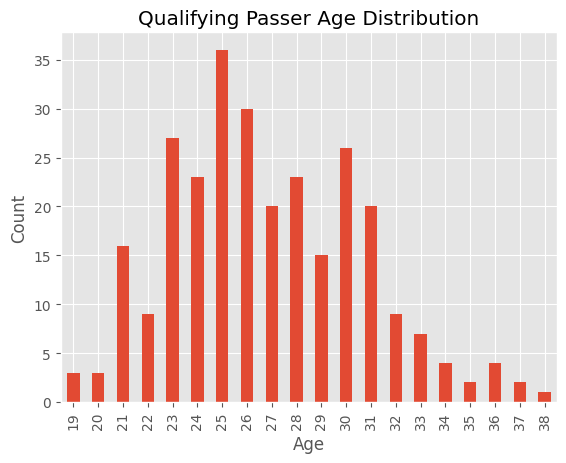

In [33]:
ax = qualifyingPlayers['Age'].value_counts().sort_index().plot(kind='bar', title='Qualifying Passer Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

In [34]:
#filteredPassDf[filteredPassDf['Pos'].apply(lambda x: 'MF' in x)]['TotCmp%'].plot(kind='hist', bins=10, title='Pass Completion % Distribution for Midfielders')

In [35]:
#filteredPassDf[filteredPassDf['Pos'].apply(lambda x: 'DF' in x)]['TotCmp%'].plot(kind='hist', title='Pass Completion % Distribution for Defenders')

In [36]:
#filteredPassDf[filteredPassDf['Pos'].apply(lambda x: 'FW' in x)]['TotCmp%'].plot(kind='hist', title='Pass Completion % Distribution for Forwards')

<AxesSubplot: title={'center': 'Progressive Passes Distribution'}, ylabel='Frequency'>

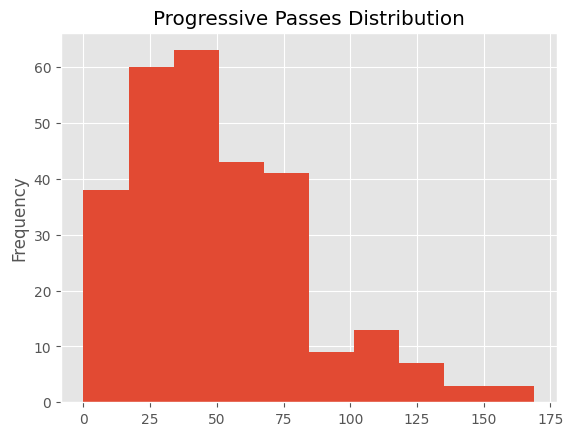

In [37]:
qualifyingPlayers['PrgP'].plot(kind='hist', title='Progressive Passes Distribution')

<AxesSubplot: title={'center': 'Progressive Passes Per 90 Distribution'}, ylabel='Frequency'>

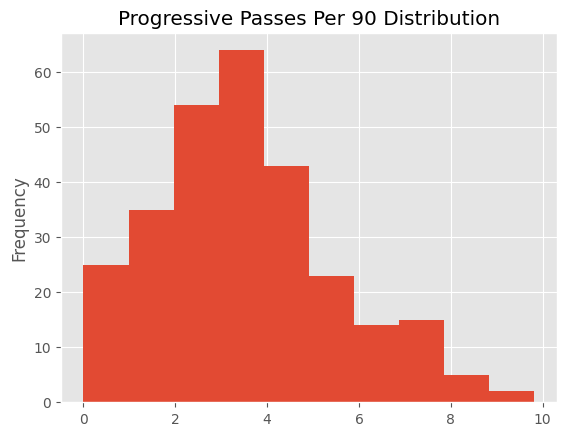

In [38]:
qualifyingPlayers['PrgPPer90'].plot(kind='hist', title='Progressive Passes Per 90 Distribution')

## Feature Relationships

- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

In [39]:
qualifyingPlayers.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', '90s', 'TotCmp', 'TotAtt',
       'TotDist', 'TotPrgDist', 'SrtCmp', 'SrtAtt', 'MedCmp', 'MedAtt',
       'LngCmp', 'LngAtt', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3Pass', 'PPA',
       'CrsPA', 'PrgP', 'Touches', 'Carries', 'TotCarDist', 'PrgCarDist',
       'PrgC', '1/3Car', 'CPA', 'Rec', 'PrgR', 'AstPer90', 'xAGPer90',
       'xAPer90', 'A-xAGPer90', 'KPPer90', '1/3PassPer90', 'PPAPer90',
       'CrsPAPer90', 'PrgPPer90', 'TouchesPer90', 'CarriesPer90',
       'TotCarDistPer90', 'PrgCarDistPer90', 'PrgCPer90', '1/3CarPer90',
       'CPAPer90', 'RecPer90', 'PrgRPer90', 'PrimaryPos', 'SecondaryPos',
       'AllPassPA', 'AllPassPAPer90', 'AllPA', 'AllPAPer90', 'SquadPoss'],
      dtype='object')

Text(0, 0.5, 'xA Per 90')

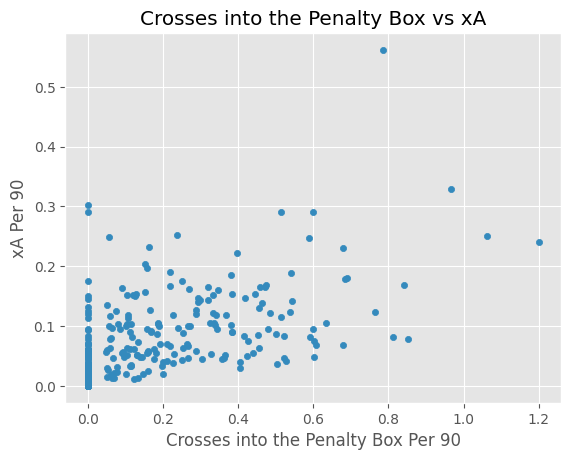

In [40]:
ax = qualifyingPlayers.plot(kind='scatter', x='CrsPAPer90', y='xAPer90', title='Crosses into the Penalty Box vs xA')
ax.set_xlabel('Crosses into the Penalty Box Per 90')
ax.set_ylabel('xA Per 90')

Text(0, 0.5, 'xA')

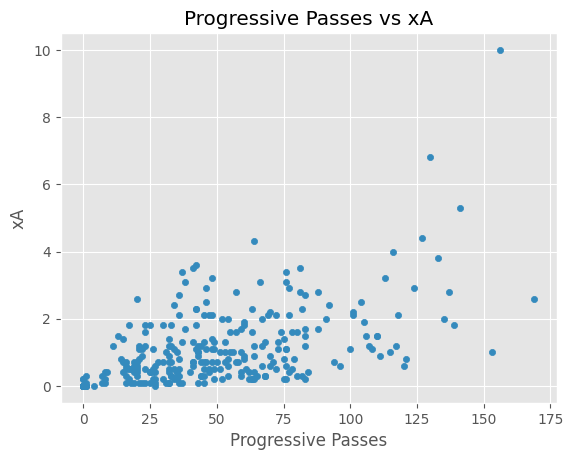

In [41]:
ax = qualifyingPlayers.plot(kind='scatter', x='PrgP', y='xA', title='Progressive Passes vs xA')
ax.set_xlabel('Progressive Passes')
ax.set_ylabel('xA')

<AxesSubplot: xlabel='PrgP', ylabel='xA'>

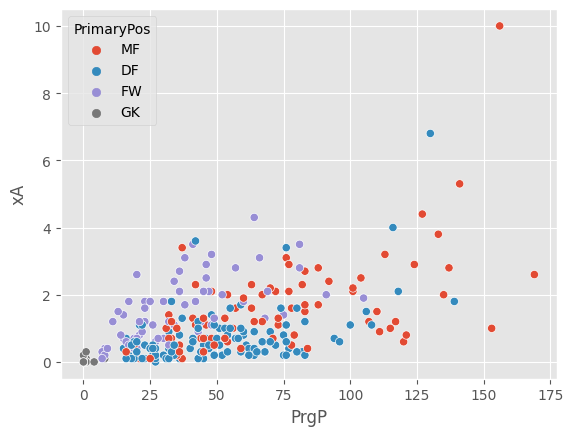

In [42]:

sns.scatterplot(data=qualifyingPlayers, x='PrgP', y='xA', hue='PrimaryPos')

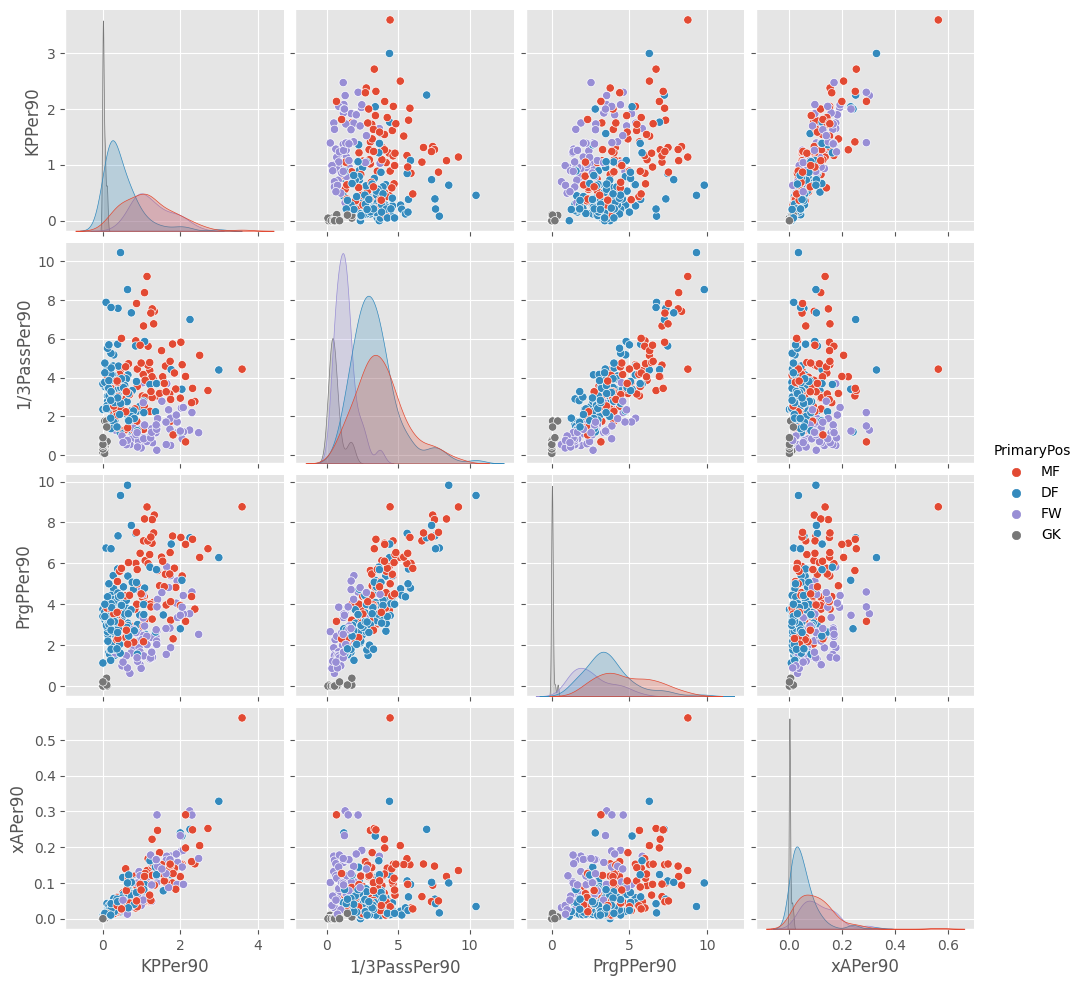

In [43]:
sns.pairplot(qualifyingPlayers, vars=['KPPer90', '1/3PassPer90', 'PrgPPer90', 'xAPer90'], hue='PrimaryPos')

In [44]:
qualifyingPlayers.sort_values(by='AllPAPer90', ascending=False)[['Player', 'Squad', 'PrimaryPos', '90s', 'AllPAPer90', 'AllPA', 'SquadPoss']].reset_index(drop=True).head(20)

,Player,Squad,PrimaryPos,90s,AllPAPer90,AllPA,SquadPoss
0,Kevin De Bruyne,Manchester City,MF,17.8,5.168539,92,65.1
1,Dejan Kulusevski,Tottenham,MF,11.7,4.957265,58,50.3
2,Riyad Mahrez,Manchester City,FW,10.0,4.900000,49,65.1
3,Bukayo Saka,Arsenal,FW,19.0,4.736842,90,57.5
4,João Cancelo,Manchester City,DF,14.2,4.647887,66,65.1
5,Jadon Sancho,Manchester Utd,FW,8.3,4.578313,38,52.5
6,Kaoru Mitoma,Brighton,FW,9.3,4.516129,42,57.8
7,Trent Alexander-Arnold,Liverpool,DF,16.0,4.437500,71,59.8
8,Ivan Perišić,Tottenham,DF,15.0,4.400000,66,50.3
9,Raheem Sterling,Chelsea,FW,12.7,4.251969,54,58.2


In [45]:
corrdf = qualifyingPlayers[['KPPer90', '1/3PassPer90', 'PrgPPer90', 'xAPer90', 'PPAPer90', 'CrsPAPer90']].corr()

<AxesSubplot: >

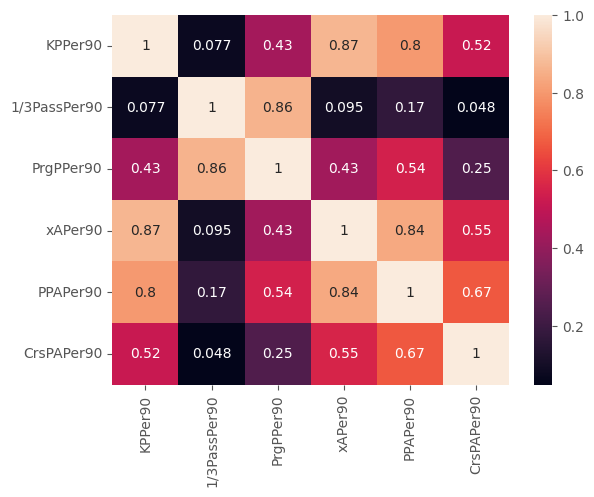

In [46]:
sns.heatmap(corrdf, annot=True)

<AxesSubplot: xlabel='SquadPoss', ylabel='AllPAPer90'>

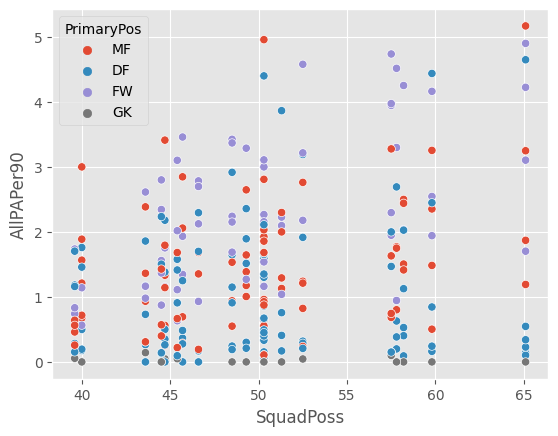

In [47]:
sns.scatterplot(data=qualifyingPlayers, x='SquadPoss', y='AllPAPer90', hue='PrimaryPos')

In [48]:
qualifyingPlayers.query('SquadPoss < 42 and AllPAPer90 > 2.5')[['Player', 'Squad', 'PrimaryPos', '90s', 'AllPAPer90', 'AllPA', 'SquadPoss']].reset_index(drop=True).head(20)

,Player,Squad,PrimaryPos,90s,AllPAPer90,AllPA,SquadPoss
0,Jaidon Anthony,Bournemouth,MF,8.0,3.0,24,40.0


In [49]:
qualifyingPlayers.query('SquadPoss < 55 and AllPAPer90 > 2.5')[['Player', 'Squad', 'PrimaryPos', '90s', 'AllPAPer90', 'AllPA', 'SquadPoss']].sort_values(by='AllPAPer90', ascending=False).reset_index(drop=True).head(20)

,Player,Squad,PrimaryPos,90s,AllPAPer90,AllPA,SquadPoss
0,Dejan Kulusevski,Tottenham,MF,11.7,4.957265,58,50.3
1,Jadon Sancho,Manchester Utd,FW,8.3,4.578313,38,52.5
2,Ivan Perišić,Tottenham,DF,15.0,4.400000,66,50.3
3,Kieran Trippier,Newcastle Utd,DF,20.7,3.864734,80,51.3
4,Wilfried Zaha,Crystal Palace,FW,18.5,3.459459,64,45.7
5,Daniel Podence,Wolves,FW,14.6,3.424658,50,48.5
6,Stuart Armstrong,Southampton,MF,8.5,3.411765,29,44.7
7,Adama Traoré,Wolves,FW,9.5,3.368421,32,48.5
8,Leon Bailey,Aston Villa,FW,14.6,3.287671,48,49.3
9,Marcus Rashford,Manchester Utd,FW,19.9,3.216080,64,52.5


<AxesSubplot: xlabel='CPAPer90', ylabel='AllPassPAPer90'>

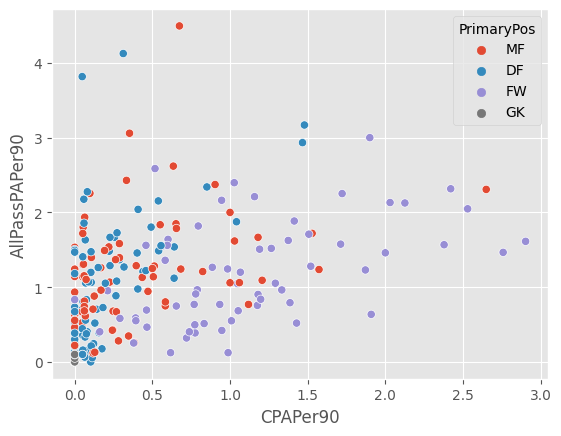

In [50]:
sns.scatterplot(data=qualifyingPlayers, x='CPAPer90', y='AllPassPAPer90', hue='PrimaryPos')

In [51]:
ballers = qualifyingPlayers.query('AllPassPAPer90 > 2.85 or CPAPer90 > 1.8')[['Player', 'Squad', 'PrimaryPos', '90s', 'AllPassPAPer90', 'AllPassPA', 'CPAPer90', 'CPA', 'AllPAPer90', 'AllPA', 'SquadPoss']].sort_values(by='AllPassPAPer90', ascending=False).sort_values(by='AllPAPer90', ascending=False).reset_index(drop=True).head(20)

ballers['PlotLabel'] = ballers['Player'].apply(lambda x: x.split(' ')[-1]).copy()

ballers

,Player,Squad,PrimaryPos,90s,AllPassPAPer90,AllPassPA,CPAPer90,CPA,AllPAPer90,AllPA,SquadPoss,PlotLabel
0,Kevin De Bruyne,Manchester City,MF,17.8,4.494382,80,0.674157,12,5.168539,92,65.1,Bruyne
1,Dejan Kulusevski,Tottenham,MF,11.7,2.307692,27,2.649573,31,4.957265,58,50.3,Kulusevski
2,Riyad Mahrez,Manchester City,FW,10.0,3.000000,30,1.900000,19,4.900000,49,65.1,Mahrez
3,Bukayo Saka,Arsenal,FW,19.0,2.315789,44,2.421053,46,4.736842,90,57.5,Saka
4,João Cancelo,Manchester City,DF,14.2,3.169014,45,1.478873,21,4.647887,66,65.1,Cancelo
5,Jadon Sancho,Manchester Utd,FW,8.3,2.048193,17,2.530120,21,4.578313,38,52.5,Sancho
6,Kaoru Mitoma,Brighton,FW,9.3,1.612903,15,2.903226,27,4.516129,42,57.8,Mitoma
7,Trent Alexander-Arnold,Liverpool,DF,16.0,4.125000,66,0.312500,5,4.437500,71,59.8,Alexander-Arnold
8,Ivan Perišić,Tottenham,DF,15.0,2.933333,44,1.466667,22,4.400000,66,50.3,Perišić
9,Raheem Sterling,Chelsea,FW,12.7,2.125984,27,2.125984,27,4.251969,54,58.2,Sterling


In [52]:
qualifyingPlayers.query('AllPassPAPer90 > 2 and CPAPer90 > 2')[['Player', 'Squad', 'PrimaryPos', '90s', 'AllPassPAPer90', 'AllPassPA', 'CPAPer90', 'AllPAPer90', 'SquadPoss']].sort_values(by='AllPassPAPer90', ascending=False).reset_index(drop=True).head(20)

,Player,Squad,PrimaryPos,90s,AllPassPAPer90,AllPassPA,CPAPer90,AllPAPer90,SquadPoss
0,Bukayo Saka,Arsenal,FW,19.0,2.315789,44,2.421053,4.736842,57.5
1,Dejan Kulusevski,Tottenham,MF,11.7,2.307692,27,2.649573,4.957265,50.3
2,Mohamed Salah,Liverpool,FW,19.7,2.131980,42,2.030457,4.162437,59.8
3,Raheem Sterling,Chelsea,FW,12.7,2.125984,27,2.125984,4.251969,58.2
4,Jadon Sancho,Manchester Utd,FW,8.3,2.048193,17,2.530120,4.578313,52.5


26

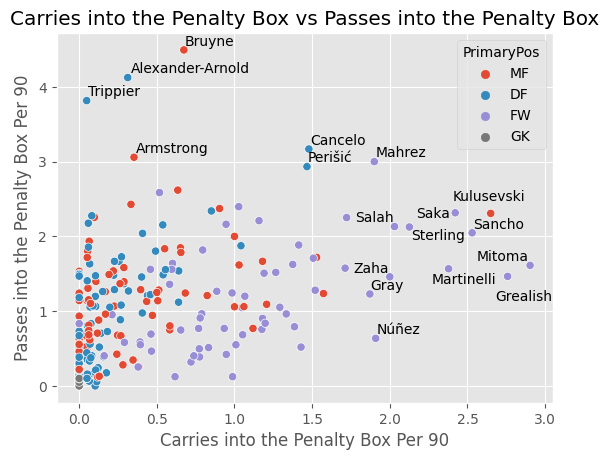

In [71]:
sns.scatterplot(data=qualifyingPlayers, x='CPAPer90', y='AllPassPAPer90', hue='PrimaryPos')

plt.xlabel('Carries into the Penalty Box Per 90')
plt.ylabel('Passes into the Penalty Box Per 90')

plt.title('Carries into the Penalty Box vs Passes into the Penalty Box')

# for i, row in ballers.iterrows(): 
#     plt.annotate(row['PlotLabel'], (row['CPAPer90'], row['AllPassPAPer90']), textcoords="offset points", xytext=(-5,-10), ha='center')

texts = [plt.text(row['CPAPer90'], row['AllPassPAPer90'], row['PlotLabel']) for i, row in ballers.iterrows()]
adjust_text(texts)



In [70]:
displayDf = qualifyingPlayers.rename(columns={'CPAPer90': 'Box Carries Per 90', 'AllPassPAPer90': 'Box Passes Per 90', 'SquadPoss': 'Squad Possession %'})
fig = px.scatter(displayDf, x='Box Carries Per 90', y='Box Passes Per 90', color='PrimaryPos', hover_name='Player')

fig.update_layout(hovermode='closest', width=800, height=600, xaxis_title='Carries into the Penalty Box Per 90', yaxis_title='Passes into the Penalty Box Per 90', title='Carries into the Penalty Box vs Passes into the Penalty Box', title_x=0.5)

fig.show()